# Import the necessary libraries


In [579]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, auc, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE



## Loading in the data

Here we will load the datasets that we will be working with

In [504]:
df_test_features = pd.read_csv('data/test_set_features.csv')
df_training_features = pd.read_csv('data/training_set_features.csv')
df_training_labels = pd.read_csv('data/training_set_labels.csv')

## Data Exploration

Here we will explore the structure of the datasets and look at the distributions before we begin the analysis.
We will first begin with the summary statistics within the data
We will first start with:
 - The training data then
 - the test data then
 - look at the labels

### Main features within the datasets:
The first column respondent_id is a unique and random identifier
For all binary variables: 0 = No; 1 = Yes.

 - h1n1_concern - _Level of concern about the H1N1 flu._
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- h1n1_knowledge - Level of knowledge about H1N1 flu.
_0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge._
- behavioral_antiviral_meds - _Has taken antiviral medications. (binary)_
- behavioral_avoidance - _Has avoided close contact with others with flu-like symptoms. (binary)_
- behavioral_face_mask - _Has bought a face mask. (binary)_
- behavioral_wash_hands - _Has frequently washed hands or used hand sanitizer. (binary)_
- behavioral_large_gatherings - _Has reduced time at large gatherings. (binary)_
- behavioral_outside_home - _Has reduced contact with people outside of own household. (binary)_
- behavioral_touch_face - _Has avoided touching eyes, nose, or mouth. (binary)_
- doctor_recc_h1n1 - _H1N1 flu vaccine was recommended by doctor. (binary)_
- doctor_recc_seasonal - _Seasonal flu vaccine was recommended by doctor. (binary)_
- chronic_med_condition - _Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)_
- child_under_6_months - _Has regular close contact with a child under the age of six months. (binary)_
- health_worker - _Is a healthcare worker. (binary)_
- health_insurance - _Has health insurance. (binary)_
- opinion_h1n1_vacc_effective - _Respondent's opinion about H1N1 vaccine effectiveness._
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_h1n1_risk - _Respondent's opinion about risk of getting sick with H1N1 flu without vaccine._
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_h1n1_sick_from_vacc - _Respondent's worry of getting sick from taking H1N1 vaccine._
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- opinion_seas_vacc_effective - _Respondent's opinion about seasonal flu vaccine effectiveness_.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_seas_risk -_Respondent's opinion about risk of getting sick with seasonal flu without vaccine._
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_seas_sick_from_vacc - _Respondent's worry of getting sick from taking seasonal flu vaccine._
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- age_group - _Age group of respondent._
- education - _Self-reported education level._
- race - _Race of respondent._
- sex - _Sex of respondent._
- income_poverty - _Household annual income of respondent with respect to 2008 Census poverty thresholds._
- marital_status - _Marital status of respondent._
- rent_or_own - _Housing situation of respondent._
- employment_status - _Employment status of respondent._
- hhs_geo_region - _Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings._
- census_msa - _Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census._
- household_adults - _Number of other adults in household, top-coded to 3._
- household_children - _Number of children in household, top-coded to 3._
- employment_industry - _Type of industry respondent is employed in. Values are represented as short random character strings._
- employment_occupation - _Type of occupation of respondent. Values are represented as short random character strings._

1. Training dataset

In [505]:
# 1. For our train dataset
# Here we are looking at the column dtypes and the number of elements within the columns
print(df_training_features.info())# Here we are looking at the column dtypes and the number of items within the columns
print(df_training_features.describe()) # Here we are attempting to look at the mean, min and max values of the columns
print("\n---------------------------\n")
print("It seems this portion of our data has 36 columns and a mixture of dtypes i.,e int, floats and object types")
print("There seems to be some missing data")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [506]:
def col_data(data):
    """This function takes in a dataframe and returns infomation about it"""
    info = print(f"""The following columns are of type numeric: \n
                 -----------------------------
                 | These are the column names|
        --------------------------------------
        {data.select_dtypes('number').columns} \n
        -------------------------------
        a total of {data.select_dtypes('number').columns.shape} columns
        ----------------------
    These other remaining columns are non-numeric \n
    --------------------------
    | These are the column names|
    -----------------------------
    {data.select_dtypes('object').columns}\n
    ----------------------------
    a total of {data.select_dtypes('object').columns.shape} columns
    """)
    return info

In [507]:
print("We will use the function we created above to get infomation about the training dataset")
col_data(df_training_features)

We will use the function we created above to get infomation about the training dataset
The following columns are of type numeric: 

                 -----------------------------
                 | These are the column names|
        --------------------------------------
        Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object') 

        -------------------------------
        a 

Lets try and visualize the missing data for this data

### Train dataset summary
- This dataset has 26707 unique Ids representing the individual respondents
- The data has a 36 columns of a mixture of int, floats and object types
- 24 of the columns are numeric while 12 columns are non-numeric
- There are some columns with some missing values
- The all of the columns in this dataset apart from the respondent_id column seem to be either behavioural or demographics data.


##### Lets try and visualize the missing data from our training dataset

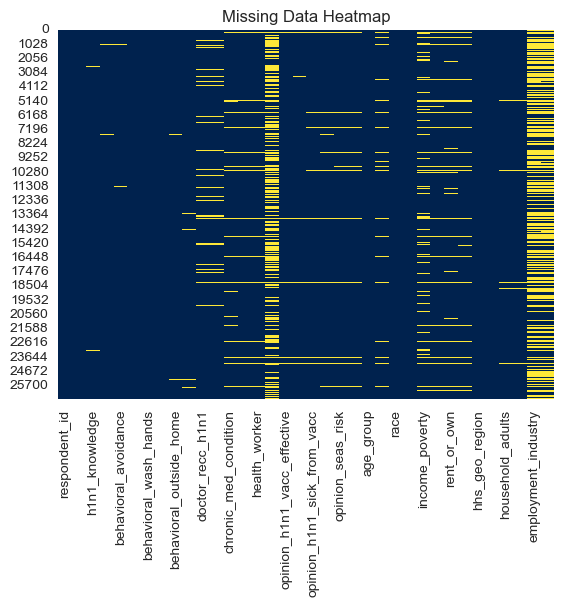

In [508]:
sns.heatmap(df_training_features.isnull(), cbar=False, cmap='cividis')
plt.title('Missing Data Heatmap')
plt.show()

#### 2. Test Dataset

In [509]:
# 2. Test Dataset
# Here we are looking at the column dtypes and the number of elements within the columns

print(df_test_features.info())# Here we are looking at the column dtypes and the number of items within the columns
print(df_test_features.describe()) # Here we are attempting to look at the mean, min and max values of the columns
print("\n---------------------------\n")
print("It seems this portion of our data has 36 columns and a mixture of dtypes i.,e int, floats and object types")
col_data(df_test_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

##### Lets try and visualize the missing data from our testing dataset

### Test dataset summary
- This dataset has 26707 unique Ids representing the individual respondents
- The data has a 36 columns of a mixture of int, floats and object types
- 24 of the columns are numeric while 12 columns are non-numeric
- There are some columns with some missing values
- The all of the columns in this dataset apart from the respondent_id column seem to be either behavioural or demographics data.

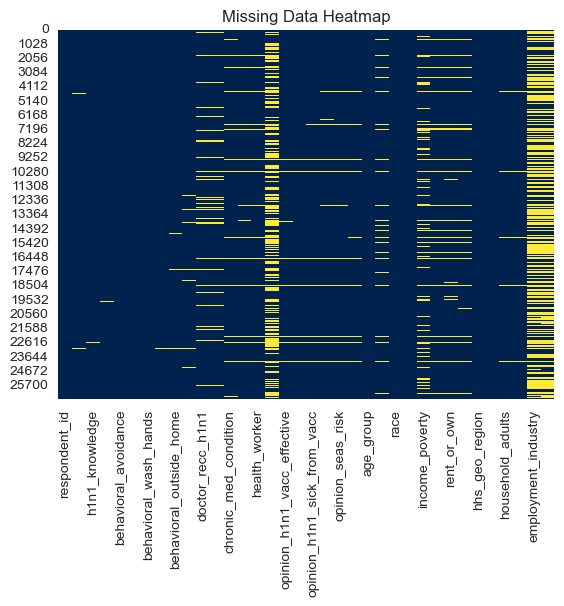

In [510]:
sns.heatmap(df_test_features.isnull(), cbar=False, cmap='cividis')
plt.title('Missing Data Heatmap')
plt.show()

3. For the Training Set_labels

In [511]:
print("The following are the summary of the columns:\n")
print(df_training_labels.info())
print("\n\nMissing values within the columns:\n\n{}".format(df_training_labels.isnull().sum()))

print("\nThe data for training labels also has 26707 entries with 3 columns of type int")


The following are the summary of the columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB
None


Missing values within the columns:

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

The data for training labels also has 26707 entries with 3 columns of type int


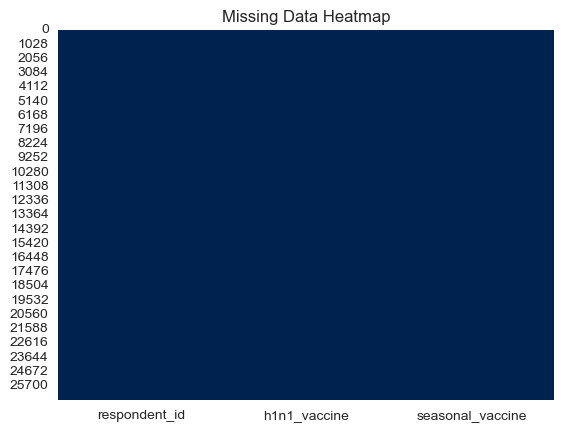

In [512]:
sns.heatmap(df_training_labels.isnull(), cbar=False, cmap='cividis')
plt.title('Missing Data Heatmap')
plt.show()

#### Training label summary
- This one has  26707 entries with 3 cols of type int
- The first column is the respondent id which contains the unique identifiers
- Then the H1N1 vaccine and the Seasonal vaccine columns
- This portion of the data has 0 missing values

#### Strategy for the missing values
- We will look at the sample distributions for each of the main data groups in our data and determine the best way for filling in the missing values

In [513]:
# Here we will categorize the columns with their data types

binary_cols = df_training_features.columns[3:16].tolist()

ordinal_cols = df_training_features.columns[[1,2,] + list(range(16,22))].tolist()

nominal_cols = df_training_features.columns[list(range(22,32)) + [-2,-1]].tolist()

numeric_cols = df_training_features.columns[list(range(32,34))].tolist()


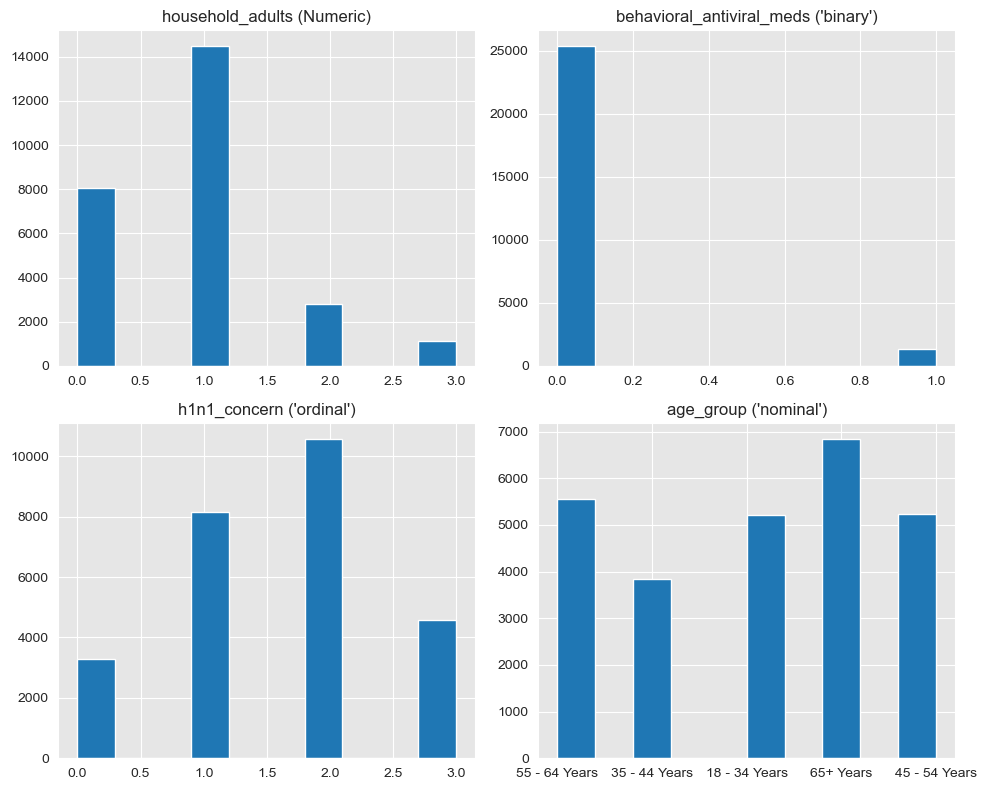

In [514]:
# Here we view the first columns and their distributions

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

# Accessing the first column from each Index
axes[0].hist(df_training_features[numeric_cols[0]])
axes[0].set_title(f"{numeric_cols[0]} (Numeric)")

axes[1].hist(df_training_features[binary_cols[0]])
axes[1].set_title(f"{binary_cols[0]} ('binary')")

axes[2].hist(df_training_features[ordinal_cols[0]])
axes[2].set_title(f"{ordinal_cols[0]} ('ordinal')")


axes[3].hist(df_training_features[nominal_cols[0]])
axes[3].set_title(f"{nominal_cols[0]} ('nominal')")

plt.tight_layout()
plt.show()



***The following is the strategy that we will use to deal with the missing values within the data***

| Data type| Action| Reason |
|---------|-------|--------|
| Binary | Fill using the mode | Because binary variables have only two categories (e.g., Yes/No). The mode is a logical choice that preserves the data's distribution. | 
| Ordinal | Fill using the mode| Because the values are categorical, they  have a natural order but not a numerical distance therefore using mode will enable us not make assumptions on the distances|
| Nominal | Fill using Missing | Because the values have no inherent order it is wise to label the data as unknown so that the model can still learn from it. |
| Numeric columns | Fill using the median| Because the data is continous and median is more robust to outliers |

We will then use the SimpleImputer class from sklearn to encode the missing values.


Note:
Our Numeric column has some non-numeric missing data which is labelled as missing. We need to convert this to a numeric type

In [515]:
def imputer(df):
    "This funcion takes in a dataframe and performs simple imputation"

    binary_imputer = SimpleImputer(strategy='most_frequent')
    df[binary_cols] = binary_imputer.fit_transform(df[binary_cols])
    ordinal_imputer = SimpleImputer(strategy='most_frequent')
    df[ordinal_cols] = ordinal_imputer.fit_transform(df[ordinal_cols])
    nominal_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
    df[nominal_cols] = nominal_imputer.fit_transform(df[nominal_cols])
    
    # Here we are converting the two numeric cols to a numeric type
    df['household_adults'] = df['household_adults'].replace('Missing', np.nan)
    df['household_children'] = df['household_children'].fillna(df['household_children'].median())

    numeric_imputer = SimpleImputer(strategy='median')
    df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

    return df

In [516]:
# Call the imputer function on both the train and test datasets
df_train = imputer(df_training_features)
df_test = imputer(df_test_features)

Lets confirm that we have removed all the nulls in our training dataset

In [517]:
df_training_features.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

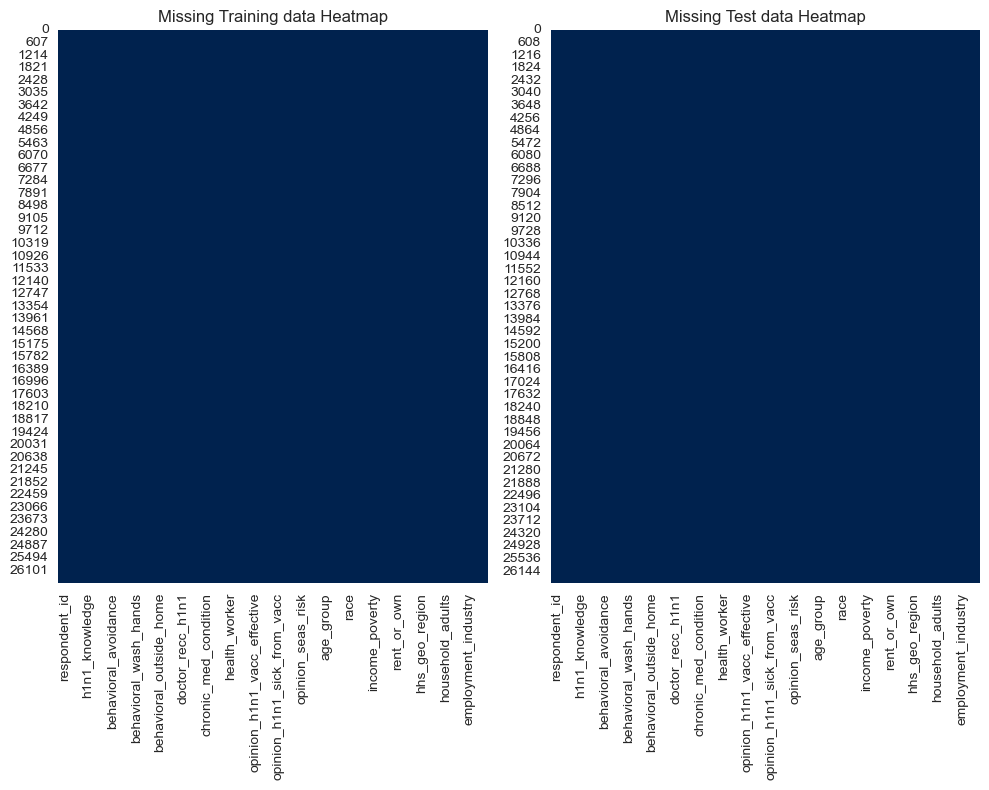

In [518]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
axes = axes.flatten()
sns.heatmap(df_training_features.isnull(), cbar=False, cmap='cividis', ax=axes[0])
axes[0].set_title('Missing Training data Heatmap')

sns.heatmap(df_test_features.isnull(), cbar=False, cmap='cividis', ax=axes[1])
axes[1].set_title('Missing Test data Heatmap')
plt.tight_layout()
plt.show()

### Addition of labels to the training data

- Before we begin building the model we first need to add the labels to the training data to ensure that our two target variables that is H1N1 vaccination and seasonal vaccination data is added to the training data.
- To do this we first need to confirm that both datasets have the same dimensions for proper merging.


In [519]:
# checking for matching column lengths

np.testing.assert_array_equal(df_train.index.values, df_training_labels.index.values, "The test has failed") 

Since the shape and the elements of these objects are equal we will proceed with merging the two datasets using the unique identifiers on the first column

### Merging the two datasets
We are merging the two datasets using the respondent Id so that we are able to get the target features onto our training dataset, this will also help us respondents that might mistakenly have only the target data but no much information.

For this process we will use the pandas .join method to concatenate the two dataframes together

In [520]:
merged_df = pd.merge(df_train, df_training_labels, how='left')
merged_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Missing,Missing,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Missing,Missing,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


Lets check the distribution of the two vaccines using a simple bar chart. 

For this we will create a function that will create both charts that is the H1N1 and the seasonal flu data

In [521]:
# Our function for checking the distribution

def vaccine_counts(vaccine_count, title):
    "This function takes in vaccination counts and title and generates a simple bar chart from the input"
    fig, ax = plt.subplots(figsize=(6, 3))

    # Plot horizontal bar chart
    bars = ax.barh(vaccine_count.index.map({0: "Not Vaccinated", 1: "Vaccinated"}), 
                vaccine_count.values, 
                color=["#13F4E19A", "#D0B22B"])

    # This adds value labels to bars
    for bar in bars:
        ax.text(bar.get_width() + 0.01, 
                bar.get_y() + bar.get_height()/2, 
                f"{bar.get_width():.2%}", 
                va='center', fontsize=10)

    ax.set_xlabel("Proportion of People")
    ax.set_title(title)
    ax.set_xlim(0, 1)
    plt.tight_layout()
    plt.show()


In [522]:
# Here we are generating the vaccination counts from the data

h1n1_count = df_training_labels.h1n1_vaccine.value_counts(normalize=True)
seasonal_vaccine_count = df_training_labels['seasonal_vaccine'].value_counts(normalize=True)

print(f"This is the result of {h1n1_count} and this is the one for the seasonal {seasonal_vaccine_count}")

This is the result of h1n1_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64 and this is the one for the seasonal seasonal_vaccine
0    0.534392
1    0.465608
Name: proportion, dtype: float64


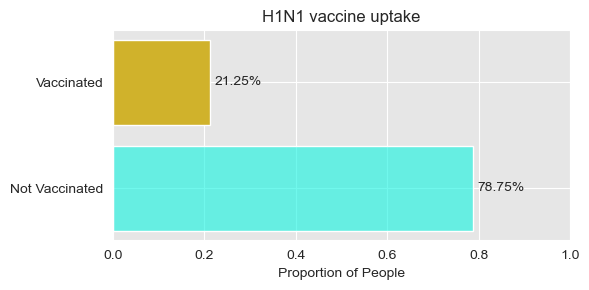

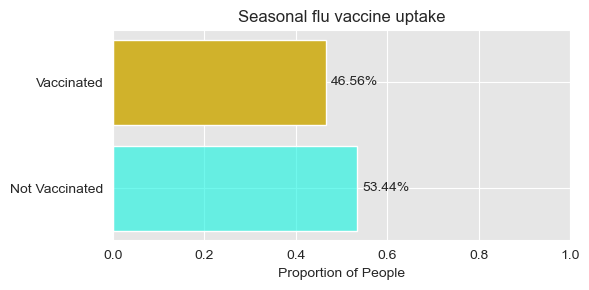

In [523]:
vaccine_counts(h1n1_count,'H1N1 vaccine uptake')
vaccine_counts(seasonal_vaccine_count,'Seasonal flu vaccine uptake')

***Interpretation:***
- From this we see that the H1N1 vaccine did not perform very well in 2009 as only 21.25% of the total respondents were vaccinated against the disease.
- For the seasonal flu the vaccination rate was almost half, indicating a better uptake than the H1N1 swine flu vaccine.
- We also note that there seems to be some class imbalance in the H1N1 vaccine. This means that if we train our model using this data as is there is a high chance that the model may gain some bias thuss favouring the majority.
- The seasonal flu vaccine seems to be relatively stable for normal modelling

#### Preprocessing
Now that we have our training data cleaned and merged with the training labels, we will begin the preprocessing phase which includes:
1. Dropping the respondent ID since it has no useful information necessary for modelling
2. Grouping the columns into two types numeric and categorical
3. Perform OneHotEncoding on the categorical columns
4. Define our X features and our target
5. fit a model 

In [524]:

# 1. Droping the respondent_ID column
df = merged_df.drop(columns=['respondent_id'])  # It's just an ID, not useful for prediction

# 2. Grouping of the columns
# numerics
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('h1n1_vaccine') # These are our targets and the numeric cols will only be on the X train
numeric_cols.remove('seasonal_vaccine') 

# Categorical
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# 3. Perform OneHotEncoding

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Choosing X and Y
X = df_encoded.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])  # features
y = df_encoded['h1n1_vaccine']  # target

# 5. Scaling our data
X[numeric_cols] = StandardScaler().fit_transform(X[numeric_cols]) # Here we are scaling our data so that we take care of outliers

# 6. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True
)



## Modelling
We will now begin building the models

#### 1. Logistical regression model
This will be our baseline model without any feature engineering or hyper-parameter tunings

In [525]:
# 6. fit the random forest

initial_model = LogisticRegression(random_state=42)
initial_model.fit(X_train, y_train)

y_pred = initial_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4207
           1       0.67      0.44      0.53      1135

    accuracy                           0.84      5342
   macro avg       0.77      0.69      0.72      5342
weighted avg       0.82      0.84      0.82      5342



This is the interpretation of the above # Baseline output;

| Target | Metric | value | Explanation |
|--------|--------|-------|------------|
|0 - Unvaccinated |precision | 0.86 | Out of all the people the model predicted as not vaccinated, 86% were actually not vaccinated | 
|1 - Vaccinated |precision |0.67 | Of those predicted to be vaccinated, only 67% actually were vaccinated |
|0 - unvaccinated | recall | 0.94 | Out of all the actual *Unvaccinated* people, the model correctly identified 94% of them|
|1 - vaccinated | recall | 0.44 | Of those who truly got the vaccine, the model correctly identified only 44%|

``With an ROC-AUC curve of 83%, shows how well the model will perform on unseen data.``

Note:

As seen in the above results, this ``initial model`` performs well when predicting unvaccinated people i.e., with an f1 score of 0.90 on the unvaccinated respondents but falls short when predicting the vaccinated people. This class imbalance needs to be the first aspect we will look at when fine tuning this model. (The F1 score is a balance between precison and recall)
What this means is that even though the model has an accuracy of 84%  the model is only good at predicting those who didn’t get vaccinated this is because it does poorly when trying to identify the vaccinated respondents missing over half of them.

### This imbalance can be critical in public health decisions especially in situations where finding the truly vaccinated people matters. ###

***The next call to action would be to address the class imbalance thats causing this***


#### Model 2Logistic regression with Balanced weights
- Here we will just use anothe logistic regression model with balanced class weights
- The hyperparameters for this model will be tuned using grid search

In [526]:
# Logistic regression with class_weight
model_2_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42) # Here we will use a balanced class weight to correct the class imbalance by penalizing the minority class
model_2_balanced.fit(X_train, y_train)

# Here we will try and tune some parameters on the model using gridsearch to boost the model performance

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  
}

model_2 = GridSearchCV(model_2_balanced, param_grid, cv=5, scoring='f1_macro') # Gridsearch uses the parameters provided to find the best parameter combinations for an optimum model
model_2.fit(X_train, y_train)

# Predictions
y_pred2 = model_2.predict(X_test)

# Evaluation
print('Lets compare the two models performance')
print('------------------------------------------')
print(classification_report(y_test,y_pred2))
print("\nLogistic Regression with Balanced Class Weights")
print("-----------------------------------------------")
print(classification_report(y_test, y_pred2))



Lets compare the two models performance
------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      4207
           1       0.48      0.73      0.57      1135

    accuracy                           0.77      5342
   macro avg       0.69      0.75      0.71      5342
weighted avg       0.82      0.77      0.79      5342


Logistic Regression with Balanced Class Weights
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      4207
           1       0.48      0.73      0.57      1135

    accuracy                           0.77      5342
   macro avg       0.69      0.75      0.71      5342
weighted avg       0.82      0.77      0.79      5342



Observation and Interpreatation
----------------------------------
|metric| shift from |shift to|
|-----|-------|---------|
| Precision  |86 and 67| to 91 and 48|
|Recall | 94 and 44 | 78,73|
| F1 score |90, 53 | 84,57|

***The model has become more sensitive to the vaccinated class. This improvement is evident in the increased F1 score and recall for that class. While precision has declined slightly, the trade-off is acceptable—especially in health data analysis, where prioritizing recall over precision is often preferred to avoid missing true positive cases.***

#### Model 3. Lets try using a basic random forest classifier on our train data
- Random forest works by building multiple decision trees and aggregating their predictions to improve accuracy and reduce overfitting.
- Its core principle is bootstrapping where it creates many random subsets of the training data with replacement. Each subset is used to train a separate decision tree

In [527]:

# 1. Training a Random Forest model
model_3 = RandomForestClassifier(n_estimators=100, random_state=42)
model_3.fit(X_train, y_train)

# 2. Predictions
y_pred_rf = model_3.predict(X_test)
y_probs_rf = model_3.predict_proba(X_test)[:, 1]

# 4. Evaluation
print("🔍 Classification Report - Random Forest ")
print(classification_report(y_test, y_pred_rf))

auc_rf = roc_auc_score(y_test, y_probs_rf)
print(f"AUC Score: {auc_rf:.4f}")


🔍 Classification Report - Random Forest 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4207
           1       0.69      0.40      0.51      1135

    accuracy                           0.83      5342
   macro avg       0.77      0.68      0.70      5342
weighted avg       0.82      0.83      0.82      5342

AUC Score: 0.8175


#### model_4 hypertuned random forest classifier

In [528]:


# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True
)

# 2. Define pipeline
pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# 3. Define parameter grid
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
    'rf__max_features': ['sqrt', 'log2']
}

# 4. GridSearch with Stratified K-Fold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
model_4 = GridSearchCV(pipe, param_grid, cv=skf, scoring='roc_auc', n_jobs=-1, verbose=1)
model_4.fit(X_train, y_train)

# 5. Evaluation
print("✅ Best Parameters:", grid.best_params_)
y_pred = model_4.predict(X_test)
y_probs = model_4.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print(f"AUC Score: {roc_auc_score(y_test, y_probs):.4f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
✅ Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4207
           1       0.66      0.49      0.56      1135

    accuracy                           0.84      5342
   macro avg       0.77      0.71      0.73      5342
weighted avg       0.83      0.84      0.83      5342

AUC Score: 0.8298


## Lets try a decision tree

In [ ]:

# Train the decision tree
model_5 = DecisionTreeClassifier(criterion='entropy')
model_5.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

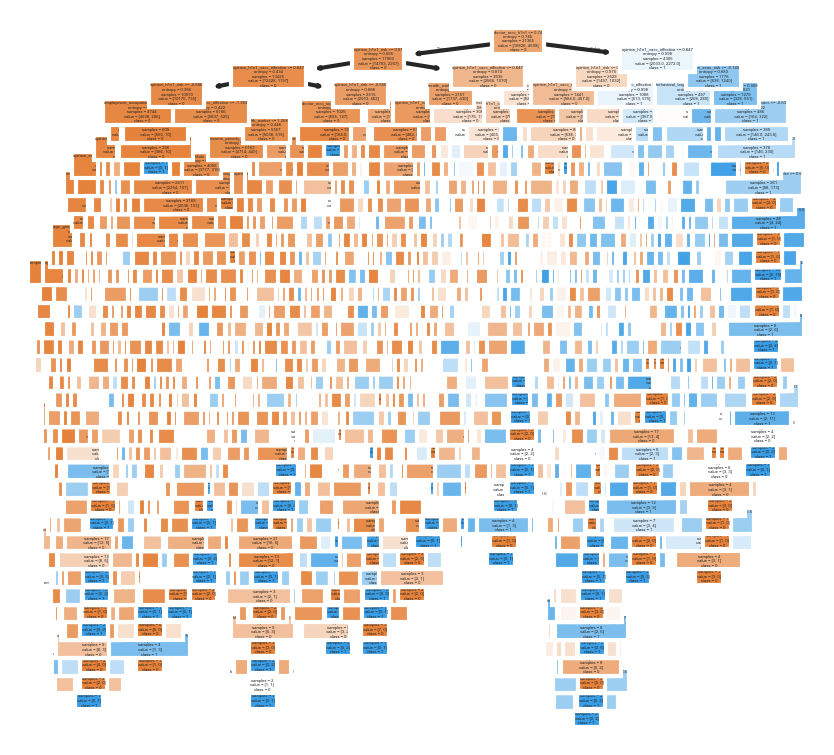

In [530]:
# Plotting the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(model_5,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [ ]:
# Evaluating the predictive performance

y_preds = model_5.predict(X_test)

print('Accuracy: ', roc_auc_score(y_test, y_preds))

Accuracy:  0.6466979200807548


## Lets try and Hypertune the decision classifier

In [580]:

# 1. Set up hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# 2. Fit the model with the new parameters

model_5 = GridSearchCV(model_5, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
model_5.fit(X_train, y_train)

# 5. Evaluate best model
best_clf = model_5.best_estimator_
y_pred = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:, 1]

# 6. Output performance
print("🔍 Best Parameters:", model_5.best_params_)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))
print("🎯 AUC Score:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
🔍 Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      4207
           1       0.65      0.40      0.50      1135

    accuracy                           0.83      5342
   macro avg       0.75      0.67      0.70      5342
weighted avg       0.81      0.83      0.81      5342

🎯 AUC Score: 0.8090922513243609


## Estimations

In [ ]:

def compare_roc_curves(model1, model2, X_test, y_test, 
                       label1="Model 1", label2="Model 2", 
                       title="ROC Curve Comparison"):
    """
    Plot ROC curves of two classifiers on the same figure.
    """
    sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
    plt.figure(figsize=(10, 8))

    # Model 1 ROC
    probs1 = model1.predict_proba(X_test)[:, 1]
    fpr1, tpr1, _ = roc_curve(y_test, probs1)
    auc1 = roc_auc_score(y_test, probs1)
    plt.plot(fpr1, tpr1, label=f"{label1} (AUC = {auc1:.2f})", color='darkorange', lw=2)

    # Model 2 ROC
    probs2 = model2.predict_proba(X_test)[:, 1]
    fpr2, tpr2, _ = roc_curve(y_test, probs2)
    auc2 = roc_auc_score(y_test, probs2)
    plt.plot(fpr2, tpr2, label=f"{label2} (AUC = {auc2:.2f})", color='steelblue', lw=2)

    # Diagonal
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    # Labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Now call the function
compare_roc_curves(
    model1=initial_model,
    model2=grid.best_estimator_,
    X_test=X_test,       # same test set for both
    y_test=y_test,
    label1="Vanilla Logistic Regression",
    label2="Balanced + Tuned Logistic Regression"
)



# Predict on X_test
y_pred1 = initial_model.predict(X_test)
y_pred2 = grid.best_estimator_.predict(X_test)

# Predict proba (for AUC)
y_prob1 = initial_model.predict_proba(X_test)[:, 1]
y_prob2 = grid.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate metrics for both models
def print_metrics(y_true, y_pred, y_probs, label):
    print(f"\n📊 Performance Metrics for {label}")
    print("-" * 50)
    print(f"AUC Score:         {roc_auc_score(y_true, y_probs):.4f}")
    print(f"Accuracy:          {accuracy_score(y_true, y_pred):.4f}")
    print(f"F1 Score:          {f1_score(y_true, y_pred):.4f}")
    print(f"Precision:         {precision_score(y_true, y_pred):.4f}")
    print(f"Recall (Sensitivity): {recall_score(y_true, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

# Print for both models
print_metrics(y_test, y_pred1, y_prob1, "Vanilla Logistic Regression")
print_metrics(y_test, y_pred2, y_prob2, "Balanced + Tuned Logistic Regression")

We can now try and identify the most important features by first of all checking the correlations

In [ ]:
# Step 1: Select only numeric columns
numeric_df = merged_df.select_dtypes(include='number')

# Step 2: Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: View correlation of 'h1n1_vaccine' with other variables
correlation_with_h1n1 = correlation_matrix['h1n1_vaccine'].sort_values(ascending=False)

# Step 4: Display
sns.heatmap(correlation_with_h1n1.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlation with H1N1 Vaccine")
plt.show()


### ROC to visualize the predicted probabilities

## Evaluation

In [588]:
models = {
    'model_1': initial_model,
    'model_2': model_2,
    'model_3': model_3,
    'model_4': model_4,
    'model_5': model_5
}

def evaluate_and_compare_models(models_dict, X_train, X_test, y_train, y_test):
    """
    THis function Evaluates and compares multiple classification models.

    Parameters:
    - models_dict: dict of {model_name: model_object}
    - X_train, X_test, y_train, y_test: train/test splits

    Returns:
    - results_df_sorted: DataFrame with performance metrics
    - best_model_name: Name of the best model based on ROC AUC
    """
    all_metrics = []

    for name, model in models_dict.items():
        print("="*60)
        print(f"🔍 Evaluating {name}...")

        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Metrics
        metrics = {
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else float('nan')
        }

        print(f"\n📄 Classification Report for {name}")
        print(classification_report(y_test, y_pred))
        print(f"ROC AUC Score: {metrics['ROC AUC']:.4f}" if y_proba is not None else "⚠️ Model does not support predict_proba.")

        all_metrics.append(metrics)

    # Summary
    results_df = pd.DataFrame(all_metrics)
    results_df_sorted = results_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)

    print("\n📊 Model Comparison Summary:")
    print(results_df_sorted)

    best_model_name = results_df_sorted.iloc[0]['Model']
    print(f"\n🏆 Best Model based on ROC AUC: {best_model_name}")

    return results_df_sorted, best_model_name


In [542]:
evaluate_and_compare_models(models, X_train, X_test, y_train, y_test)


🔍 Evaluating model_1...

📄 Classification Report for model_1
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4207
           1       0.67      0.44      0.53      1135

    accuracy                           0.84      5342
   macro avg       0.77      0.69      0.72      5342
weighted avg       0.82      0.84      0.82      5342

ROC AUC Score: 0.8292
🔍 Evaluating model_2...

📄 Classification Report for model_2
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      4207
           1       0.47      0.72      0.57      1135

    accuracy                           0.77      5342
   macro avg       0.69      0.75      0.71      5342
weighted avg       0.82      0.77      0.79      5342

ROC AUC Score: 0.8292
🔍 Evaluating model_3...

📄 Classification Report for model_3
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4207
          

(     Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
 0  model_4  0.837888   0.659549  0.489868  0.562184  0.829807
 1  model_1  0.835829   0.674324  0.439648  0.532267  0.829216
 2  model_2  0.770872   0.474292  0.723348  0.572924  0.829153
 3  model_3  0.834519   0.688722  0.403524  0.508889  0.817517
 4  model_5  0.756645   0.431193  0.455507  0.443016  0.646698,
 'model_4')

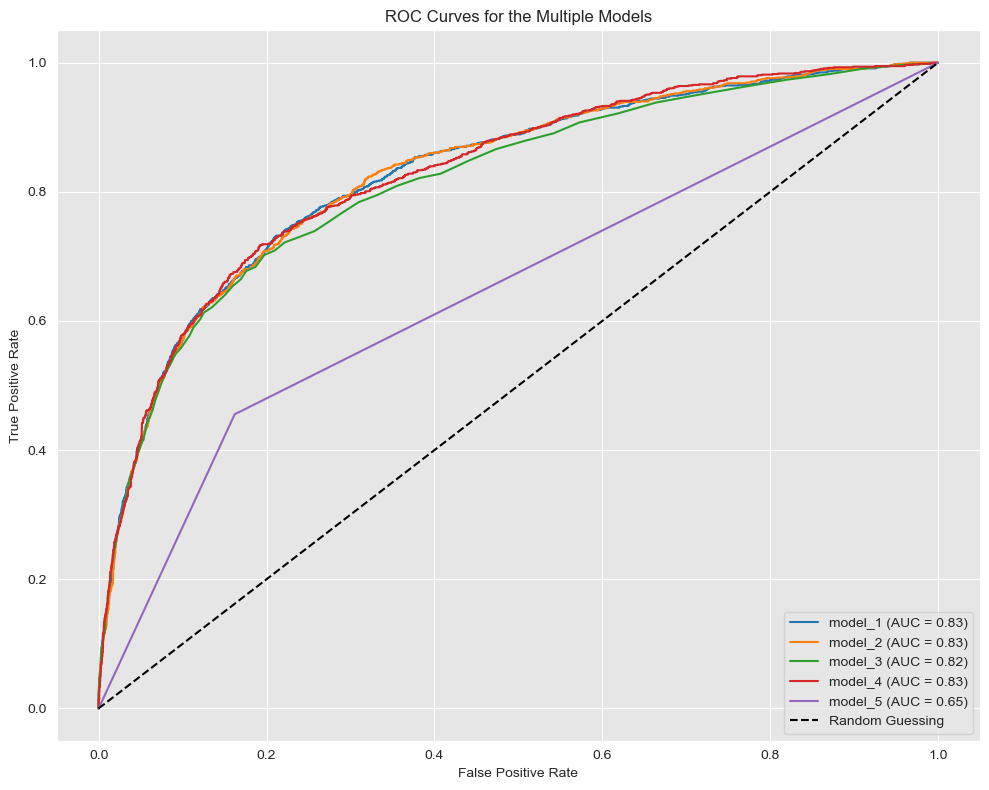

In [582]:
def plot_roc_curves(models_dict, X_test, y_test):
    plt.figure(figsize=(10, 8))

    for name, model in models_dict.items():
        # Check if model supports predict_proba
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):  # for some SVMs
            y_proba = model.decision_function(X_test)
        else:
            print(f"{name} does not support probability estimates. Skipping.")
            continue

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # Plot baseline
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

    plt.title('ROC Curves for the Multiple Models')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_curves(models, X_test, y_test)

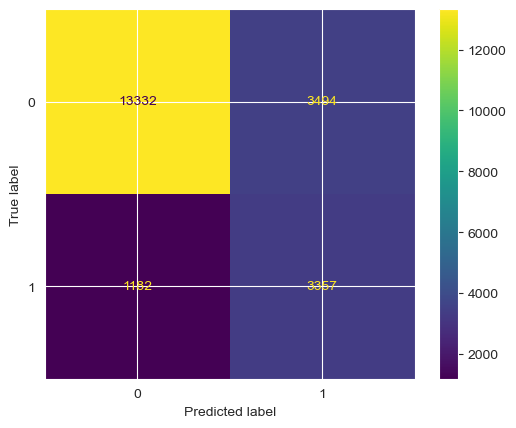

In [584]:


# Create helper function to plot confusion matrix
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data , and y data . 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot()
    plt.show()

conf_matrix_plot(model_2,X_train,y_train)

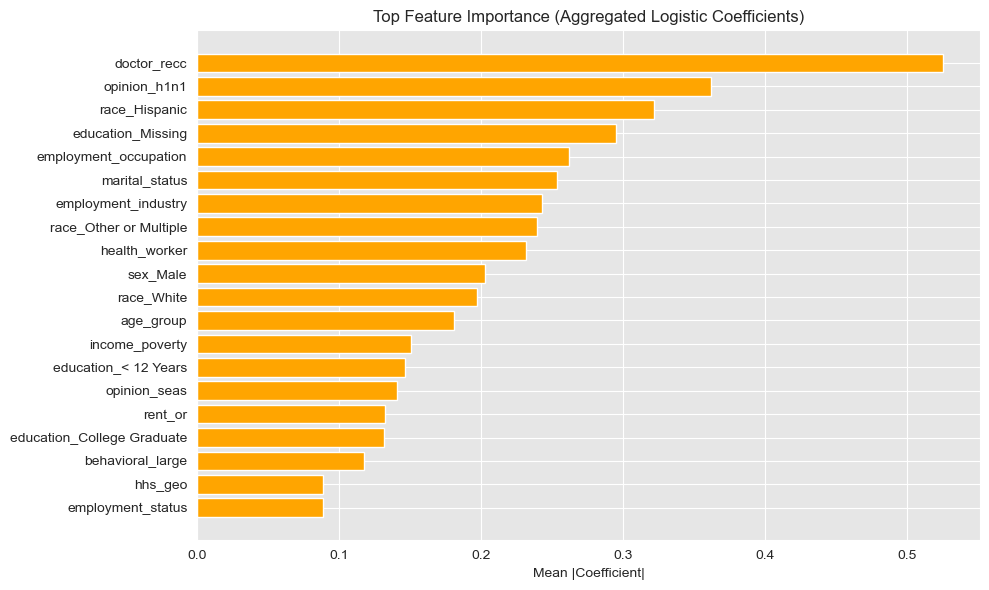

,BaseFeature,Mean Abs Coefficient
0,doctor_recc,0.525431
1,opinion_h1n1,0.362157
2,race_Hispanic,0.322289
3,education_Missing,0.295045
4,employment_occupation,0.261922
5,marital_status,0.253621
6,employment_industry,0.242780
7,race_Other or Multiple,0.239659
8,health_worker,0.231694
9,sex_Male,0.203015


In [577]:
def show_logreg_coefficients(model, feature_names, top_n=20):
    coefs = model.coef_[0]

    # Simplify feature names to base (e.g., keep "employment_occupation" from "employment_occupation_dcjcmpih")
    clean_names = []
    base_names = []
    for name in feature_names:
        parts = name.split('_')
        base_name = '_'.join(parts[:2]) if len(parts) >= 2 else name
        clean_names.append(name)
        base_names.append(base_name)

    # Create DataFrame with original and base feature names
    coef_df = pd.DataFrame({
        'Feature': clean_names,
        'BaseFeature': base_names,
        'Coefficient': coefs
    })

    # Aggregate by base feature: mean of absolute coefficients
    agg_df = (
        coef_df
        .groupby('BaseFeature')['Coefficient']
        .apply(lambda x: x.abs().mean())
        .sort_values(ascending=False)
        .reset_index()
        .rename(columns={'Coefficient': 'Mean Abs Coefficient'})
    )

    # Select top N for plotting
    top_df = agg_df.head(top_n)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(top_df['BaseFeature'], top_df['Mean Abs Coefficient'], color='orange')
    plt.gca().invert_yaxis()
    plt.title('Top Feature Importance (Aggregated Logistic Coefficients)')
    plt.xlabel('Mean |Coefficient|')
    plt.tight_layout()
    plt.show()

    return top_df

show_logreg_coefficients(model_2_balanced, model_2_balanced.feature_names_in_)